In [1]:
#used to read the csv and excel files and store it as a dataframe
import pandas as pd

#Loading the given data using this command
#data is in excel format i renamed it to chit.xlsx
chit=pd.read_excel('chit.xlsx',skiprows=1)
#checking size
print(chit.shape)


(25, 6)


In [2]:
#checking the Read data printing all values
print(chit.head(25))

    Month  Contribution  Amount won by the bidder  \
0       1          2000                     40000   
1       2          2000                     42000   
2       3          2000                     45000   
3       4          2000                     48000   
4       5          2000                     40000   
5       6          2000                     42000   
6       7          2000                     43000   
7       8          2000                     44000   
8       9          2000                     40000   
9      10          2000                     42000   
10     11          2000                     45000   
11     12          2000                     48000   
12     13          2000                     40000   
13     14          2000                     42000   
14     15          2000                     43000   
15     16          2000                     43000   
16     17          2000                     41000   
17     18          2000                     42

In [3]:
print(chit.columns)
#renaming the column name for convienance

chit.columns=['month','contribution','bid','commission','netbid','share']

Index(['Month', 'Contribution', 'Amount won by the bidder',
       'Chit fund organizer commission', 'Net amount recd by Bid winner',
       'Amount returned to everyone in the group'],
      dtype='object')


In [4]:
chit.head(25)

,month,contribution,bid,commission,netbid,share
0,1,2000,40000,2500,37500,400
1,2,2000,42000,2500,39500,320
2,3,2000,45000,2500,42500,200
3,4,2000,48000,2500,45500,80
4,5,2000,40000,2500,37500,400
5,6,2000,42000,2500,39500,320
6,7,2000,43000,2500,40500,280
7,8,2000,44000,2500,41500,240
8,9,2000,40000,2500,37500,400
9,10,2000,42000,2500,39500,320


In [5]:
#calculating the total contribution for each person

totalContribution=chit['contribution'].sum()
print("Maximum Contribution Rs:",totalContribution)

Maximum Contribution Rs: 50000


In [6]:
#Each person contributing totally Rs: 50000
totalShare=chit['share'].sum()
print("Maximum Share Rs:",totalShare)

#Calculating Total Commission Made by the company
print('Total Commission Rs:',chit['commission'].sum())


Maximum Share Rs: 6200
Total Commission Rs: 62500


In [7]:
#saving the netbit amount separately
bidAmountData=chit['netbid']
# What is the Annualized  Return of the person who bids in the first month ?
Month=int(input("Month: "))
bidAmount=bidAmountData[Month-1]
annualReturn=bidAmount+totalShare
print("Annual Return",Month,"th month is Rs.", annualReturn)


Month: 1
Annual Return 1 th month is Rs. 43700


In [8]:
# What is the Annualized  Return of the person who bids in the last month ?
Month=int(input("Month: "))
bidAmount=bidAmountData[Month-1]
annualReturn=bidAmount+totalShare
print("Annual Return",Month,"th month is Rs.", annualReturn)

Month: 25
Annual Return 25 th month is Rs. 53700


In [9]:
#Script for the whole values

#creating the list for storing the values list start with []

Month=[]
Annualreturn=[]
ProfitLoss=[]
Percentage=[]

for i in range(0,25):
    bidAmount=bidAmountData[i]
    #Adding the Month Because zero month is not available
    Month.append(i+1)
    #Annual Return
    annualReturn=bidAmount+totalShare
    #appending to the list
    Annualreturn.append(annualReturn)
    #Calculating Profit or loss
    plAmount=annualReturn-totalContribution
    #appending to list
    ProfitLoss.append(plAmount)
    #Calculating Data frames
    Percentage.append((plAmount/totalContribution)*100)
    
newchit={'Month':Month,'Annualreturn':Annualreturn,'ProfitLoss':ProfitLoss,'Percentage':Percentage}

newchitdata=pd.DataFrame(newchit)
print(newchitdata)


    Month  Annualreturn  ProfitLoss  Percentage
0       1         43700       -6300       -12.6
1       2         45700       -4300        -8.6
2       3         48700       -1300        -2.6
3       4         51700        1700         3.4
4       5         43700       -6300       -12.6
5       6         45700       -4300        -8.6
6       7         46700       -3300        -6.6
7       8         47700       -2300        -4.6
8       9         43700       -6300       -12.6
9      10         45700       -4300        -8.6
10     11         48700       -1300        -2.6
11     12         51700        1700         3.4
12     13         43700       -6300       -12.6
13     14         45700       -4300        -8.6
14     15         46700       -3300        -6.6
15     16         46700       -3300        -6.6
16     17         44700       -5300       -10.6
17     18         45700       -4300        -8.6
18     19         48700       -1300        -2.6
19     20         48700       -1300     

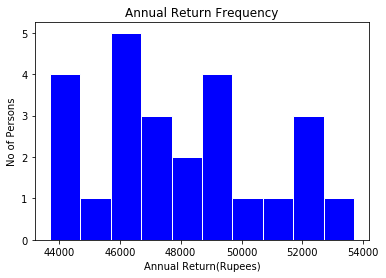

In [11]:
#import matplot library for visualizing the results of newchitdata

import matplotlib.pyplot as plt
import seaborn as sns
#histplot helps to the show frequency of the amounts
plt.hist(newchitdata['Annualreturn'],
        color='blue',
        edgecolor='white',
        bins=10)
plt.title('Annual Return Frequency')
plt.xlabel('Annual Return(Rupees)')
plt.ylabel('No of Persons')
plt.show()



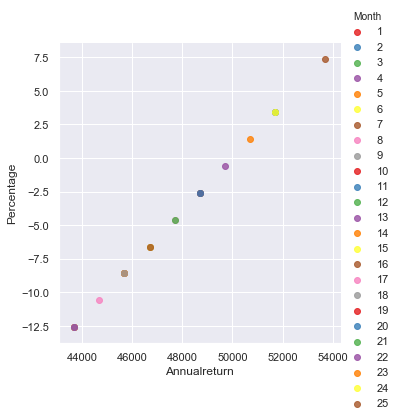

In [12]:
sns.set(style="darkgrid")
sns.lmplot(x='Annualreturn',y='Percentage',data=newchitdata,fit_reg=False,hue='Month',legend=True,palette='Set1')


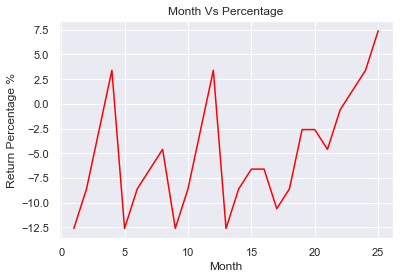

In [13]:
plt.plot(newchitdata['Month'],newchitdata['Percentage'],c='red')
plt.title('Month Vs Percentage')
plt.xlabel('Month')
plt.ylabel('Return Percentage %')
plt.show()


# From the Above Data I'm getting the inference

The Person Who makes bid in the First month Get Rs:43700 With Return Percentage of -12.6 %(Loss)
The Person Who makes bid in the First month Get Rs:53700 With Return Percentage of 7.4 %(Profit)
The person Who bids above Rs 47000 has the Chance to Get Minimum profit of 1.4 %(Profit)

Maximum Return Percentage Profit 7.4%
Minimum Return Percentage Loss -12.6%
The Chit Fund Company makes Rs.62500 as the commission charges
 
#Graphs Created for Easy Representation

In [14]:
#saving the obtained newdatafor further usage

newchitdata.to_csv('newchitdata.csv')